In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-price-history/Microsoft_stock_data.csv


In [2]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/microsoft-stock-price-history/Microsoft_stock_data.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,1986-03-13,0.059598,0.062259,0.054277,0.054277,1031788800
1,1986-03-14,0.061726,0.062791,0.059598,0.059598,308160000
2,1986-03-17,0.062791,0.063323,0.061726,0.061726,133171200
3,1986-03-18,0.061194,0.063323,0.060662,0.062791,67766400
4,1986-03-19,0.060130,0.061726,0.059598,0.061194,47894400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9911 non-null   object 
 1   Close   9911 non-null   float64
 2   High    9911 non-null   float64
 3   Low     9911 non-null   float64
 4   Open    9911 non-null   float64
 5   Volume  9911 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.7+ KB


In [5]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,9911.000000,9911.000000,9911.000000,9911.000000,9.911000e+03
mean,61.367344,61.954381,60.723374,61.343928,5.593001e+07
std,105.327803,106.244056,104.288076,105.275370,3.808432e+07
min,0.055341,0.056405,0.054277,0.054277,2.304000e+06
25%,3.697189,3.745080,3.649299,3.697188,3.089035e+07
50%,19.368290,19.557930,19.107380,19.342338,4.912000e+07
75%,41.251879,41.513203,40.922019,41.217678,6.993120e+07
max,505.820007,508.299988,502.790009,503.049988,1.031789e+09


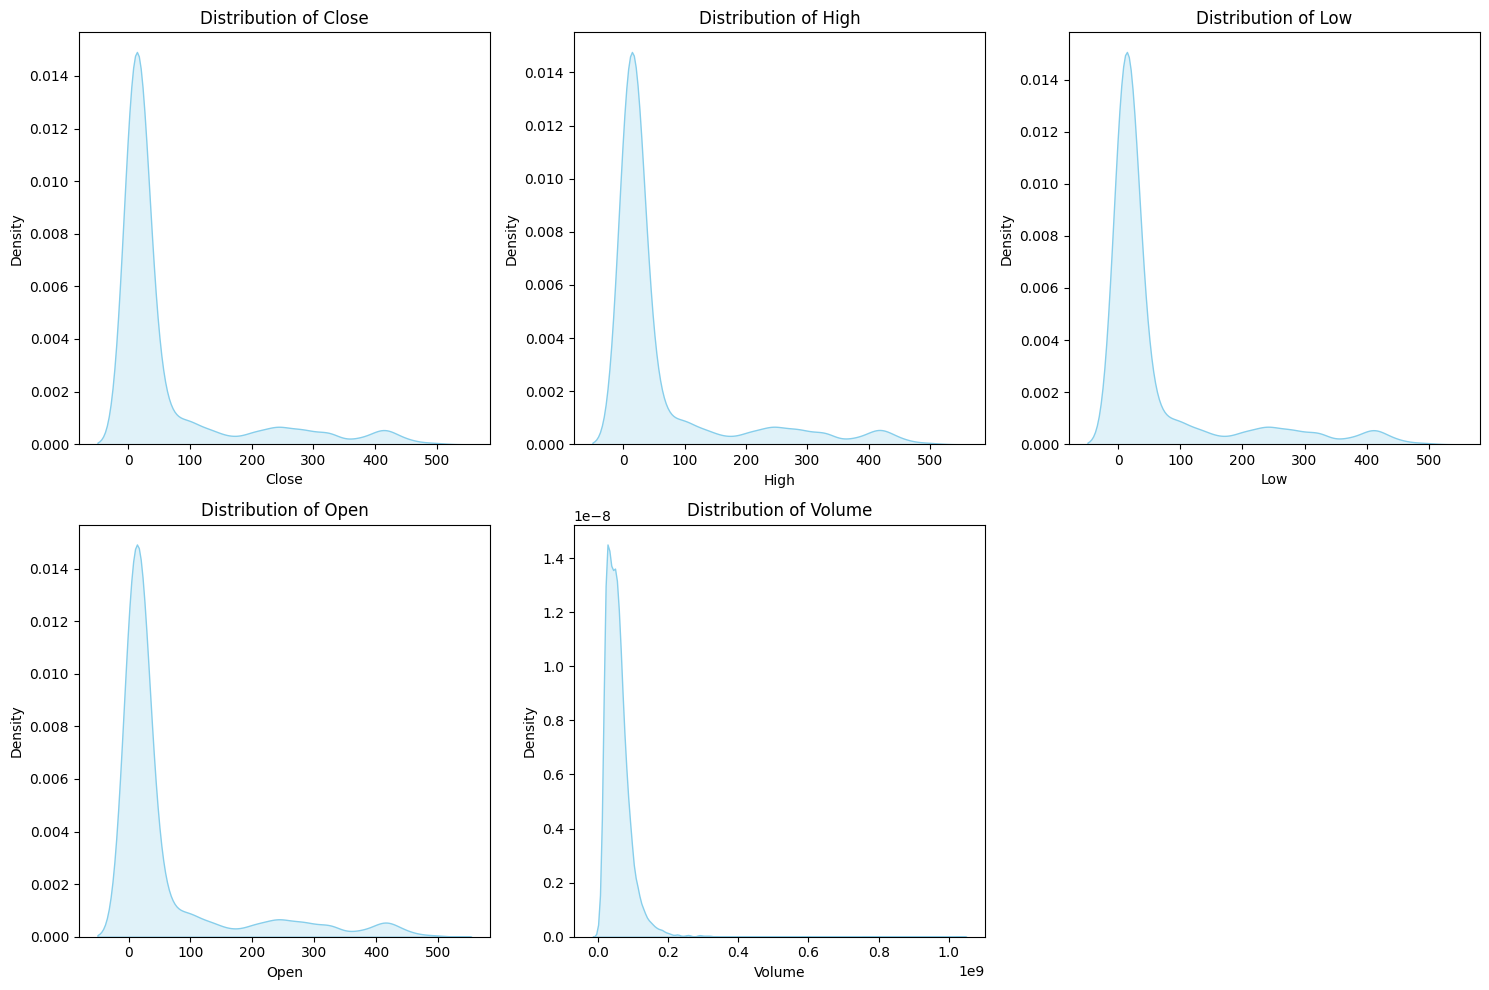

In [7]:
# Columns to visualize
columns_to_plot = ['Close', 'High', 'Low', 'Open', 'Volume']

# Plot KDEs for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

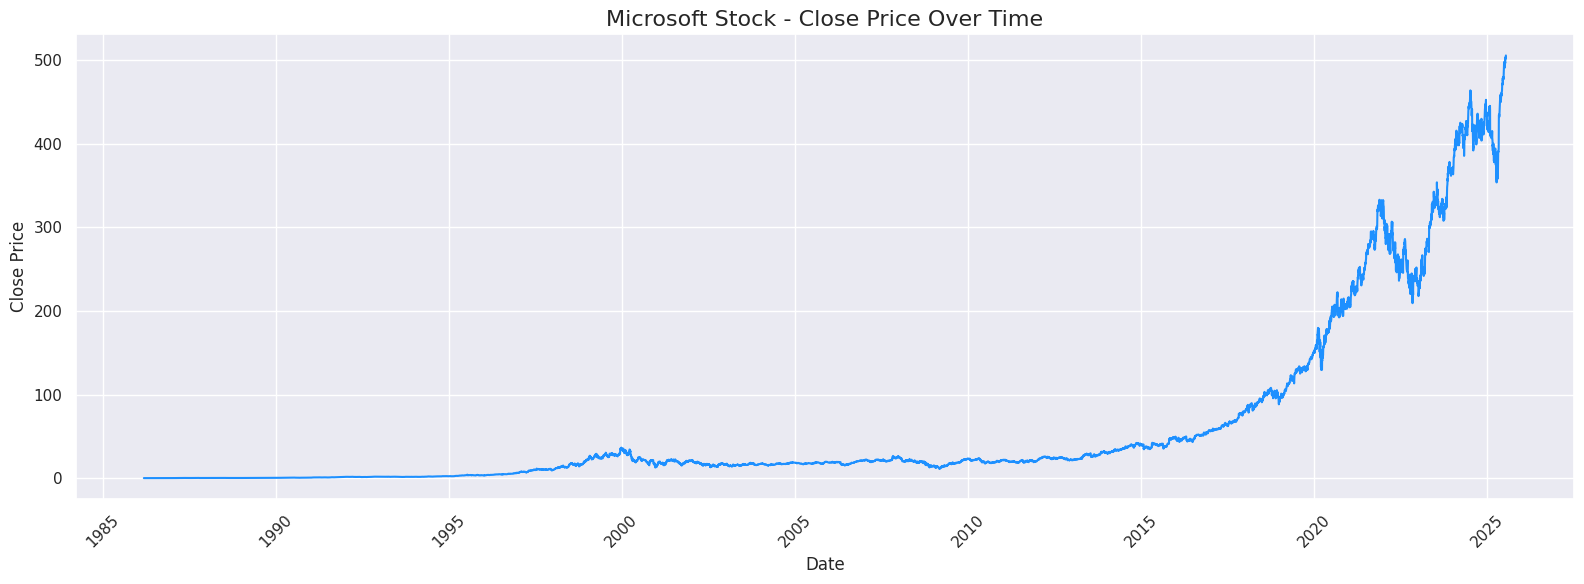

In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date just in case
df = df.sort_values('Date')

# Set plotting style
sns.set(style="darkgrid")

# Plot time series of 'Close' prices
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Close'], color='dodgerblue', linewidth=1.5)
plt.title('Microsoft Stock - Close Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

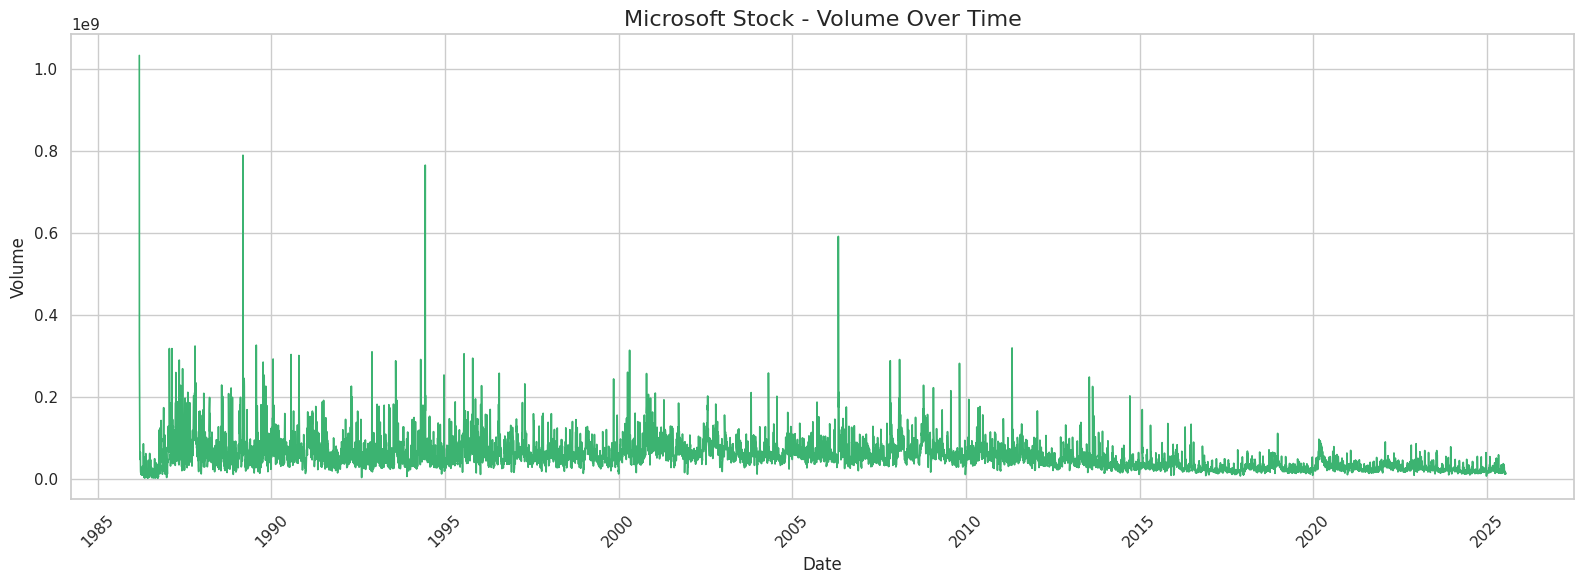

In [9]:
# Sort by date to ensure correct timeline
df = df.sort_values('Date')

# Set the style for the plot
sns.set(style="whitegrid")

# Plot time series of 'Volume'
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Volume'], color='mediumseagreen', linewidth=1.2)
plt.title('Microsoft Stock - Volume Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


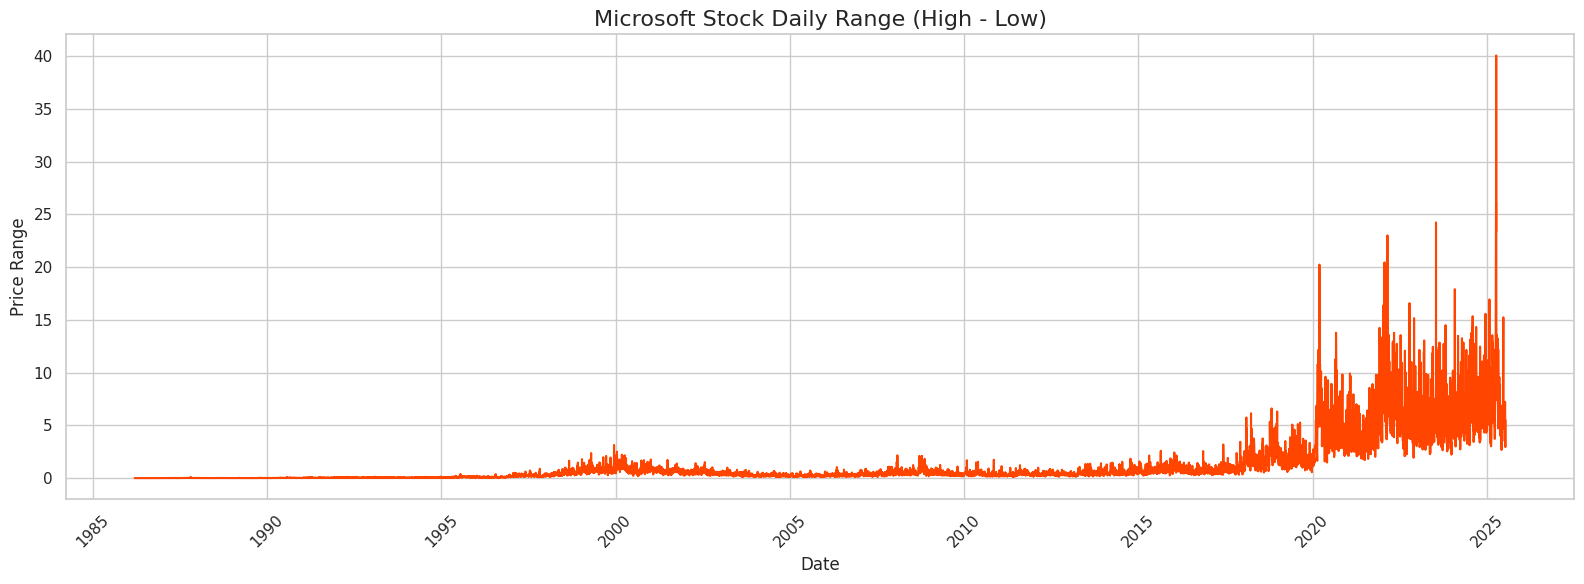

In [10]:
# Sort by date
df = df.sort_values('Date')

# Calculate daily range (volatility)
df['Daily_Range'] = df['High'] - df['Low']

# Plot Daily Range over time
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['Date'], y=df['Daily_Range'], color='orangered')
plt.title('Microsoft Stock Daily Range (High - Low)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

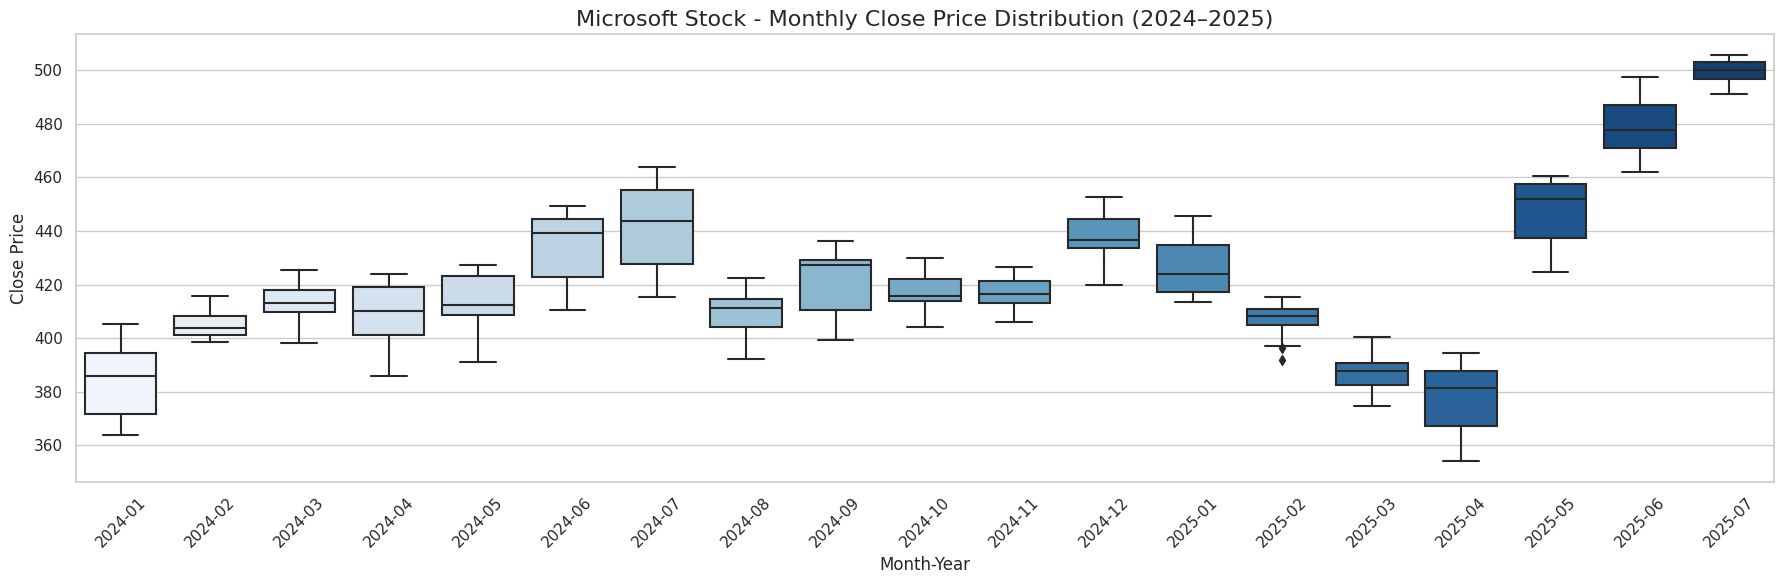

In [11]:
# Filter dates from Jan 2024 to Dec 2025
filtered_df = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2025-12-31')].copy()

# Create 'Month-Year' label for grouping
filtered_df['Month_Year'] = filtered_df['Date'].dt.to_period('M').astype(str)

# Set plot style
sns.set(style="whitegrid")

# Create box plot
plt.figure(figsize=(18, 6))
sns.boxplot(data=filtered_df, x='Month_Year', y='Close', palette='Blues')
plt.title('Microsoft Stock - Monthly Close Price Distribution (2024–2025)', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


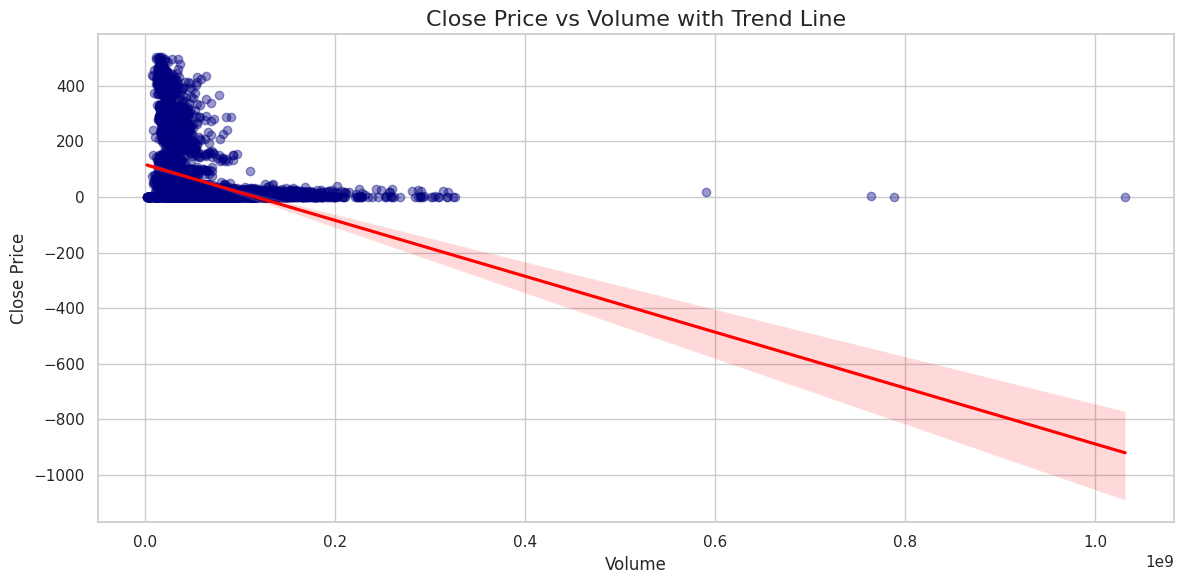

In [12]:
# Drop missing values if any
df = df.dropna(subset=['Close', 'Volume'])

# Set style
sns.set(style="whitegrid")

# Scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Volume', y='Close', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'}, color='navy')
plt.title('Close Price vs Volume with Trend Line', fontsize=16)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

           Close      High       Low      Open    Volume
Close   1.000000  0.999947  0.999949  0.999887 -0.363742
High    0.999947  1.000000  0.999932  0.999949 -0.362958
Low     0.999949  0.999932  1.000000  0.999949 -0.364403
Open    0.999887  0.999949  0.999949  1.000000 -0.363653
Volume -0.363742 -0.362958 -0.364403 -0.363653  1.000000


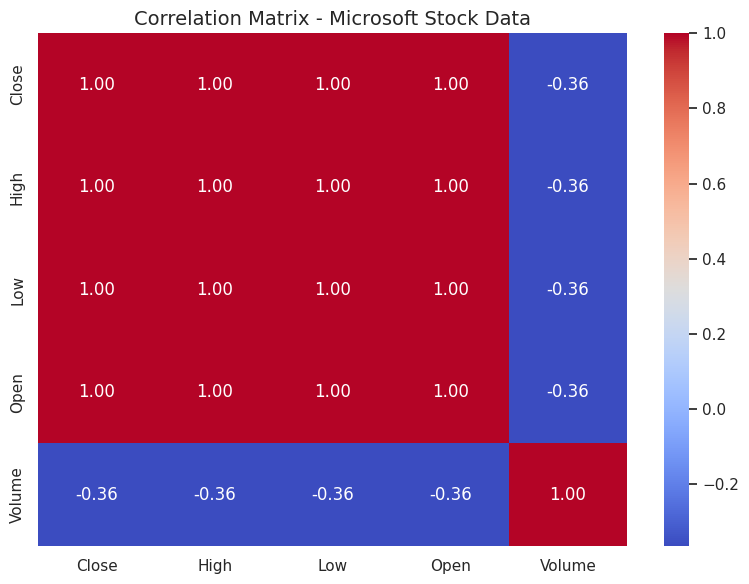

In [13]:
# Select relevant columns
columns = ['Close', 'High', 'Low', 'Open', 'Volume']
corr_matrix = df[columns].corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Microsoft Stock Data', fontsize=14)
plt.tight_layout()
plt.show()

📉 RMSE: 0.56
📊 R² Score: 1.00


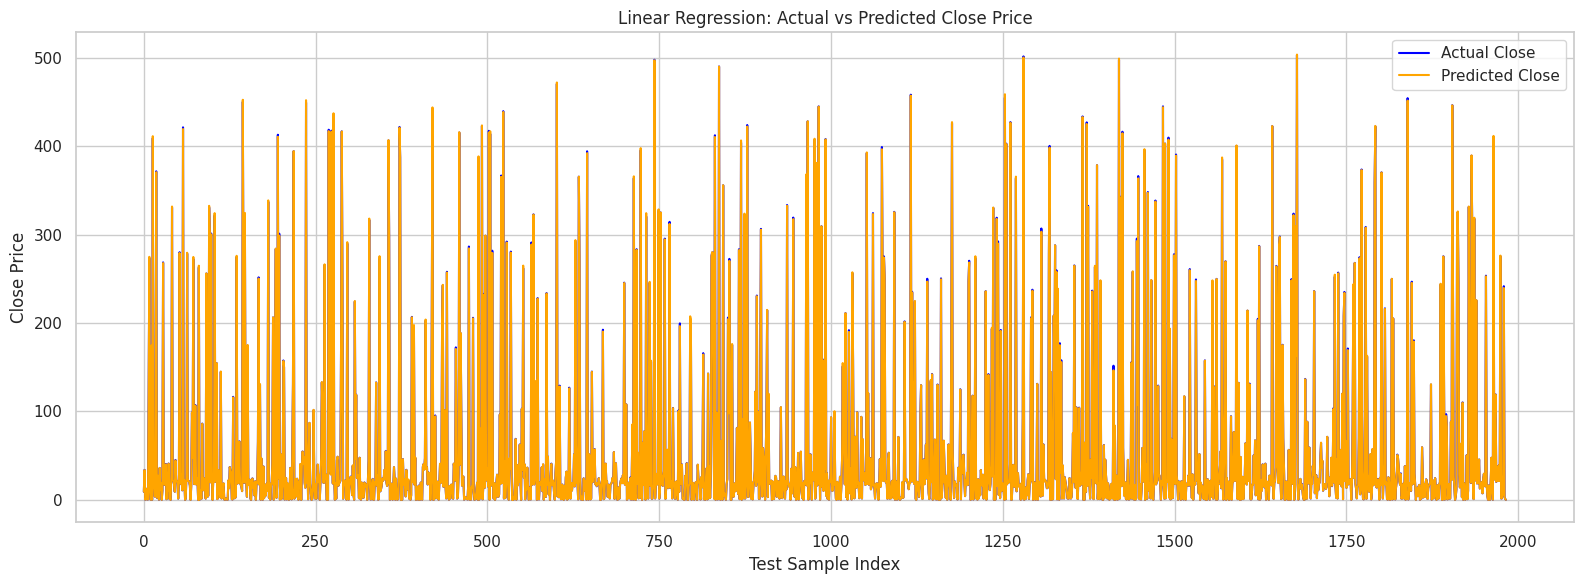

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = df.sort_values('Date')

# Extract date components as features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Define features and target
features = ['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.2f}")

# Optional: Plot actual vs predicted
plt.figure(figsize=(16, 6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='orange')
plt.title('Linear Regression: Actual vs Predicted Close Price')
plt.xlabel('Test Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()